# Detecção de Anomalia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat = loadmat("ex8data1.mat")
X = mat["X"]
Xval = mat["Xval"]
yval = mat["yval"]

Text(0, 0.5, 'Taxa de transferência (mb/s)')

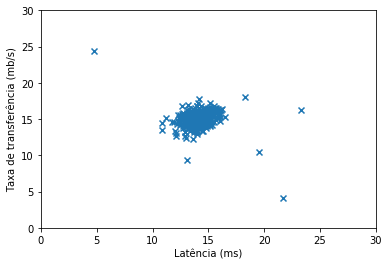

In [3]:
plt.scatter(X[:,0],X[:,1],marker="x")
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latência (ms)")
plt.ylabel("Taxa de transferência (mb/s)")

In [5]:
def estimateGaussian(X):
    
    m = X.shape[0]
    
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var

In [6]:
mu, sigma2 = estimateGaussian(X)

In [7]:
def multivariateGaussian(X, mu, sigma2):
    
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p

In [8]:
p = multivariateGaussian(X, mu, sigma2)

In [9]:
def selectThreshold(yval, pval):
    best_epi = 0
    best_F1 = 0
    
    stepsize = (max(pval) -min(pval))/1000
    epi_range = np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions = (pval<epi)[:,np.newaxis]
        tp = np.sum(predictions[yval==1]==1)
        fp = np.sum(predictions[yval==0]==1)
        fn = np.sum(predictions[yval==1]==0)
        
        # compute precision, recall and F1
        prec = tp/(tp+fp)
        rec = tp/(tp+fn)
        
        F1 = (2*prec*rec)/(prec+rec)
        
        if F1 > best_F1:
            best_F1 =F1
            best_epi = epi
        
    return best_epi, best_F1

In [ ]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)

In [10]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print("Melhor epsilon obtido por validação:",epsilon)
print("Melhor F1 na validação:",F1)

Melhor epsilon obtido por validação: 8.990852779269495e-05
Melhor F1 na validação: 0.8750000000000001


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


# Sistemas de Recomendação

In [2]:
mat3 = loadmat("ex8_movies.mat")
mat4 = loadmat("ex8_movieParams.mat")
Y = mat3["Y"]
R = mat3["R"]
X = mat4["X"]
Theta = mat4["Theta"]

In [3]:
print("Average rating for movie 1 (Toy Story):",np.sum(Y[0,:]*R[0,:])/np.sum(R[0,:]),"/5")

Average rating for movie 1 (Toy Story): 3.8783185840707963 /5


Text(0, 0.5, 'Movies')

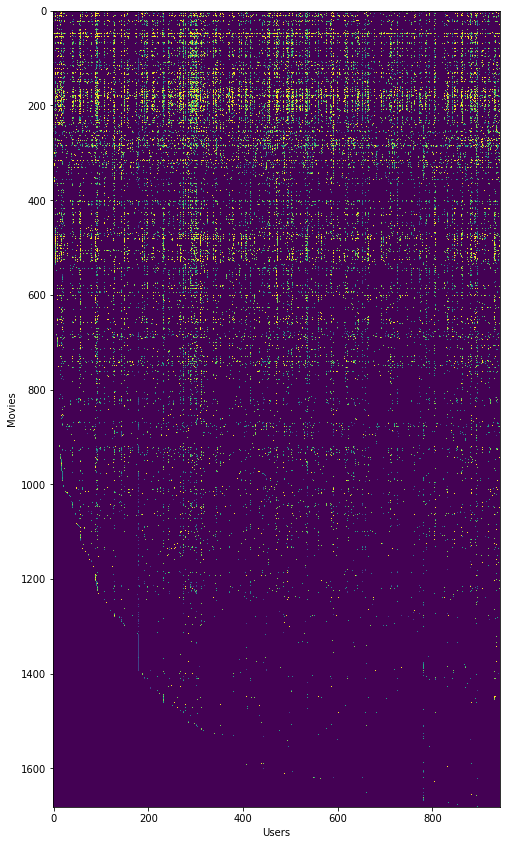

In [4]:
plt.figure(figsize=(8,16))
plt.imshow(Y)
plt.xlabel("Users")
plt.ylabel("Movies")

In [5]:
def  cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):

    X = params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)
    
    predictions =  X @ Theta.T
    err = (predictions - Y)
    J = 1/2 * np.sum((err**2) * R)
    

    reg_X =  Lambda/2 * np.sum(Theta**2)
    reg_Theta = Lambda/2 *np.sum(X**2)
    reg_J = J + reg_X + reg_Theta
    

    X_grad = err*R @ Theta
    Theta_grad = (err*R).T @ X
    grad = np.append(X_grad.flatten(),Theta_grad.flatten())
    

    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    
    return J, grad, reg_J, reg_grad

In [6]:
num_users, num_movies, num_features = 4,5,3
X_test = X[:num_movies,:num_features]
Theta_test= Theta[:num_users,:num_features]
Y_test = Y[:num_movies,:num_users]
R_test = R[:num_movies,:num_users]
params = np.append(X_test.flatten(),Theta_test.flatten())

J, grad = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 0)[:2]
print("Custo sobre os parâmetros carregados:",J)

J2, grad2 = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)[2:]
print("Custo sobre os parâmetros carregados (lambda = 1.5):",J2)

Custo sobre os parâmetros carregados: 22.224603725685675
Custo sobre os parâmetros carregados (lambda = 1.5): 31.34405624427422


In [7]:
movieList = open("movie_ids.txt","r").read().split("\n")[:-1]
movieList

['1 Toy Story (1995)',
 '2 GoldenEye (1995)',
 '3 Four Rooms (1995)',
 '4 Get Shorty (1995)',
 '5 Copycat (1995)',
 '6 Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 '7 Twelve Monkeys (1995)',
 '8 Babe (1995)',
 '9 Dead Man Walking (1995)',
 '10 Richard III (1995)',
 '11 Seven (Se7en) (1995)',
 '12 Usual Suspects, The (1995)',
 '13 Mighty Aphrodite (1995)',
 '14 Postino, Il (1994)',
 "15 Mr. Holland's Opus (1995)",
 '16 French Twist (Gazon maudit) (1995)',
 '17 From Dusk Till Dawn (1996)',
 '18 White Balloon, The (1995)',
 "19 Antonia's Line (1995)",
 '20 Angels and Insects (1995)',
 '21 Muppet Treasure Island (1996)',
 '22 Braveheart (1995)',
 '23 Taxi Driver (1976)',
 '24 Rumble in the Bronx (1995)',
 '25 Birdcage, The (1996)',
 '26 Brothers McMullen, The (1995)',
 '27 Bad Boys (1995)',
 '28 Apollo 13 (1995)',
 '29 Batman Forever (1995)',
 '30 Belle de jour (1967)',
 '31 Crimson Tide (1995)',
 '32 Crumb (1994)',
 '33 Desperado (1995)',
 '34 Doom Generation, The (1995)',
 '35

In [8]:
my_ratings = np.zeros((1682,1))

my_ratings[0] = 4 
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[82]= 4
my_ratings[225] = 5
my_ratings[354]= 5

print("Notas do novo usuário:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Nota",int(my_ratings[i]),"para o índice",movieList[i])

Notas do novo usuário:

Nota 4 para o índice 1 Toy Story (1995)
Nota 3 para o índice 7 Twelve Monkeys (1995)
Nota 5 para o índice 12 Usual Suspects, The (1995)
Nota 4 para o índice 54 Outbreak (1995)
Nota 5 para o índice 64 Shawshank Redemption, The (1994)
Nota 3 para o índice 66 While You Were Sleeping (1995)
Nota 5 para o índice 69 Forrest Gump (1994)
Nota 4 para o índice 83 Much Ado About Nothing (1993)
Nota 2 para o índice 98 Silence of the Lambs, The (1991)
Nota 5 para o índice 226 Die Hard 2 (1990)
Nota 5 para o índice 355 Sphere (1998)


In [9]:
def normalizeRatings(Y, R):
    
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m):
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
        
    return Ynorm, Ymean

In [10]:
def gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,alpha,num_iters,Lambda):

    X = initial_parameters[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = initial_parameters[num_movies*num_features:].reshape(num_users,num_features)
    
    J_history =[]
    
    for i in range(num_iters):
        params = np.append(X.flatten(),Theta.flatten())
        cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]
        
        X_grad = grad[:num_movies*num_features].reshape(num_movies,num_features)
        Theta_grad = grad[num_movies*num_features:].reshape(num_users,num_features)
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        J_history.append(cost)
    
    paramsFinal = np.append(X.flatten(),Theta.flatten())
    return paramsFinal , J_history

In [11]:
Y = np.hstack((my_ratings,Y))
R =np.hstack((my_ratings!=0,R))

Ynorm, Ymean = normalizeRatings(Y, R)

In [17]:
num_users = Y.shape[1]
num_movies = Y.shape[0]
num_features = 10

X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lambda = 10

paramsFinal, J_history = gradientDescent(initial_parameters,Ynorm,R,num_users,num_movies,num_features,0.001,400,Lambda)

Text(0.5, 1.0, 'Função de Custo usando Gradiente Descendente')

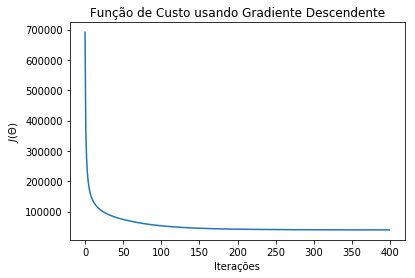

In [18]:
plt.plot(J_history)
plt.xlabel("Iterações")
plt.ylabel("$J(\Theta)$")
plt.title("Função de Custo usando Gradiente Descendente")

In [19]:
X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)

p = X @ Theta.T
my_predictions = p[:,0][:,np.newaxis] + Ymean

In [20]:
import pandas as pd
df = pd.DataFrame(np.hstack((my_predictions,np.array(movieList)[:,np.newaxis])))
df.sort_values(by=[0],ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)

In [25]:
print("Melhores recomendações para você:\n")
for i in range(10):
    print("Nota predita",round(float(df[0][i]),1)," para o índice",df[1][i])

Melhores recomendações para você:

Nota predita 5.0  para o índice 1201 Marlene Dietrich: Shadow and Light (1996) 
Nota predita 5.0  para o índice 1122 They Made Me a Criminal (1939)
Nota predita 5.0  para o índice 814 Great Day in Harlem, A (1994)
Nota predita 5.0  para o índice 1599 Someone Else's America (1995)
Nota predita 5.0  para o índice 1653 Entertaining Angels: The Dorothy Day Story (1996)
Nota predita 5.0  para o índice 1536 Aiqing wansui (1994)
Nota predita 5.0  para o índice 1189 Prefontaine (1997)
Nota predita 5.0  para o índice 1500 Santa with Muscles (1996)
Nota predita 5.0  para o índice 1293 Star Kid (1997)
Nota predita 5.0  para o índice 1467 Saint of Fort Washington, The (1993)
